In [1]:
import os
import numpy as np
import pandas as pd
import pywt
import matplotlib.pyplot as plt

In [2]:
kingfa_datasets_path = "./kingfadatasets/"

In [3]:
def wpt1D(data, wavelet='db1', mode='symmetric', maxlevel=4):
    wp = pywt.WaveletPacket(data=data[3500:4011], wavelet=wavelet, mode=mode, maxlevel=maxlevel)
    paths = [node.path for node in wp.get_level(4)]  # 列出所有树节点路径
    df_wpt = pd.DataFrame()  # 合并所有四级子节点
    for a in paths:
        df_wpt[a] = wp[a].data
    return df_wpt.values

In [4]:
X = np.array(pd.read_csv(kingfa_datasets_path+"data.csv", index_col=0))

In [5]:
X = np.apply_along_axis(wpt1D, 1, X)

In [6]:
y = np.array(pd.read_csv(kingfa_datasets_path+"target.csv", index_col=0))

In [7]:
print(X.shape)
print(y.shape)

(3000, 32, 16)
(3000, 1)


In [8]:
import keras
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import Adam

Using TensorFlow backend.


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1024)

In [10]:
X_train = X_train.reshape(-1, 32, 16, 1)
X_test = X_test.reshape(-1, 32, 16, 1)
y_train = keras.utils.to_categorical(y_train, 3)
y_test = keras.utils.to_categorical(y_test, 3)

In [11]:
model = Sequential()

In [12]:
model.add(Conv2D(filters=16, kernel_size=(7, 5), input_shape=(32, 16, 1)))
model.add(Activation('sigmoid'))
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))

In [13]:
model.add(Conv2D(filters=32, kernel_size=(5, 3), padding='same'))
model.add(Activation('sigmoid'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

In [14]:
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('sigmoid'))
model.add(Dense(3))
model.add(Activation('softmax'))

In [15]:
adam = Adam(lr=1e-4)

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 12, 16)        576       
_________________________________________________________________
activation_1 (Activation)    (None, 26, 12, 16)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 6, 16)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 6, 32)         7712      
_________________________________________________________________
activation_2 (Activation)    (None, 13, 6, 32)         0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 3, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 672)               0         
__________

In [17]:
model.compile(optimizer=adam, loss='squared_hinge', metrics=['accuracy'])

In [18]:
history = model.fit(X_train, y_train, batch_size=64, epochs=300, validation_split=0.1)

Train on 2295 samples, validate on 255 samples
Epoch 1/300
2295/2295 [==============================] - 2s 1ms/step - loss: 0.8153 - acc: 0.3325 - val_loss: 0.8141 - val_acc: 0.3529
Epoch 2/300
2295/2295 [==============================] - 1s 570us/step - loss: 0.8143 - acc: 0.3381 - val_loss: 0.8135 - val_acc: 0.3255
Epoch 3/300
2295/2295 [==============================] - 1s 601us/step - loss: 0.8137 - acc: 0.3481 - val_loss: 0.8128 - val_acc: 0.3255
Epoch 4/300
2295/2295 [==============================] - 1s 576us/step - loss: 0.8124 - acc: 0.4275 - val_loss: 0.8127 - val_acc: 0.6471
Epoch 5/300
2295/2295 [==============================] - 1s 599us/step - loss: 0.8118 - acc: 0.4200 - val_loss: 0.8114 - val_acc: 0.3255
Epoch 6/300
2295/2295 [==============================] - 1s 570us/step - loss: 0.8101 - acc: 0.5460 - val_loss: 0.8088 - val_acc: 0.6706
Epoch 7/300
2295/2295 [==============================] - 1s 586us/step - loss: 0.8086 - acc: 0.6475 - val_loss: 0.8071 - val_acc: 0.8

2295/2295 [==============================] - 1s 607us/step - loss: 0.6856 - acc: 0.9399 - val_loss: 0.6887 - val_acc: 0.9255
Epoch 60/300
2295/2295 [==============================] - 1s 559us/step - loss: 0.6853 - acc: 0.9386 - val_loss: 0.6884 - val_acc: 0.9255
Epoch 61/300
2295/2295 [==============================] - 1s 576us/step - loss: 0.6849 - acc: 0.9416 - val_loss: 0.6886 - val_acc: 0.9216
Epoch 62/300
2295/2295 [==============================] - 1s 578us/step - loss: 0.6847 - acc: 0.9394 - val_loss: 0.6889 - val_acc: 0.9216
Epoch 63/300
2295/2295 [==============================] - 1s 602us/step - loss: 0.6844 - acc: 0.9416 - val_loss: 0.6876 - val_acc: 0.9255
Epoch 64/300
2295/2295 [==============================] - 1s 570us/step - loss: 0.6842 - acc: 0.9420 - val_loss: 0.6875 - val_acc: 0.9255
Epoch 65/300
2295/2295 [==============================] - 1s 577us/step - loss: 0.6839 - acc: 0.9412 - val_loss: 0.6875 - val_acc: 0.9216
Epoch 66/300
2295/2295 [=======================

2295/2295 [==============================] - 1s 561us/step - loss: 0.6765 - acc: 0.9625 - val_loss: 0.6808 - val_acc: 0.9373
Epoch 119/300
2295/2295 [==============================] - 1s 572us/step - loss: 0.6767 - acc: 0.9621 - val_loss: 0.6800 - val_acc: 0.9373
Epoch 120/300
2295/2295 [==============================] - 1s 559us/step - loss: 0.6762 - acc: 0.9643 - val_loss: 0.6796 - val_acc: 0.9373
Epoch 121/300
2295/2295 [==============================] - 1s 607us/step - loss: 0.6763 - acc: 0.9621 - val_loss: 0.6790 - val_acc: 0.9373
Epoch 122/300
2295/2295 [==============================] - 1s 605us/step - loss: 0.6759 - acc: 0.9630 - val_loss: 0.6792 - val_acc: 0.9373
Epoch 123/300
2295/2295 [==============================] - 1s 584us/step - loss: 0.6759 - acc: 0.9638 - val_loss: 0.6781 - val_acc: 0.9490
Epoch 124/300
2295/2295 [==============================] - 1s 597us/step - loss: 0.6757 - acc: 0.9647 - val_loss: 0.6788 - val_acc: 0.9373
Epoch 125/300
2295/2295 [================

2295/2295 [==============================] - 1s 323us/step - loss: 0.6700 - acc: 0.9943 - val_loss: 0.6715 - val_acc: 0.9843
Epoch 178/300
2295/2295 [==============================] - 1s 292us/step - loss: 0.6700 - acc: 0.9935 - val_loss: 0.6711 - val_acc: 0.9922
Epoch 179/300
2295/2295 [==============================] - 1s 297us/step - loss: 0.6698 - acc: 0.9952 - val_loss: 0.6710 - val_acc: 0.9922
Epoch 180/300
2295/2295 [==============================] - 1s 289us/step - loss: 0.6698 - acc: 0.9956 - val_loss: 0.6709 - val_acc: 0.9922
Epoch 181/300
2295/2295 [==============================] - 1s 295us/step - loss: 0.6697 - acc: 0.9948 - val_loss: 0.6712 - val_acc: 0.9804
Epoch 182/300
2295/2295 [==============================] - 1s 295us/step - loss: 0.6698 - acc: 0.9956 - val_loss: 0.6707 - val_acc: 0.9961
Epoch 183/300
2295/2295 [==============================] - 1s 305us/step - loss: 0.6696 - acc: 0.9956 - val_loss: 0.6710 - val_acc: 0.9882
Epoch 184/300
2295/2295 [================

2295/2295 [==============================] - 1s 275us/step - loss: 0.6677 - acc: 0.9983 - val_loss: 0.6684 - val_acc: 0.9961
Epoch 237/300
2295/2295 [==============================] - 1s 293us/step - loss: 0.6676 - acc: 0.9996 - val_loss: 0.6689 - val_acc: 1.0000
Epoch 238/300
2295/2295 [==============================] - 1s 326us/step - loss: 0.6677 - acc: 0.9987 - val_loss: 0.6685 - val_acc: 0.9961
Epoch 239/300
2295/2295 [==============================] - 1s 294us/step - loss: 0.6676 - acc: 0.9996 - val_loss: 0.6685 - val_acc: 1.0000
Epoch 240/300
2295/2295 [==============================] - 1s 294us/step - loss: 0.6676 - acc: 0.9991 - val_loss: 0.6683 - val_acc: 0.9961
Epoch 241/300
2295/2295 [==============================] - 1s 286us/step - loss: 0.6676 - acc: 0.9991 - val_loss: 0.6687 - val_acc: 1.0000
Epoch 242/300
2295/2295 [==============================] - 1s 352us/step - loss: 0.6676 - acc: 0.9987 - val_loss: 0.6683 - val_acc: 0.9961
Epoch 243/300
2295/2295 [================

2295/2295 [==============================] - 1s 290us/step - loss: 0.6670 - acc: 1.0000 - val_loss: 0.6677 - val_acc: 0.9961
Epoch 296/300
2295/2295 [==============================] - 1s 282us/step - loss: 0.6670 - acc: 1.0000 - val_loss: 0.6677 - val_acc: 1.0000
Epoch 297/300
2295/2295 [==============================] - 1s 283us/step - loss: 0.6670 - acc: 1.0000 - val_loss: 0.6677 - val_acc: 1.0000
Epoch 298/300
2295/2295 [==============================] - 1s 288us/step - loss: 0.6670 - acc: 1.0000 - val_loss: 0.6677 - val_acc: 0.9961
Epoch 299/300
2295/2295 [==============================] - 1s 285us/step - loss: 0.6670 - acc: 1.0000 - val_loss: 0.6677 - val_acc: 0.9961
Epoch 300/300
2295/2295 [==============================] - 1s 294us/step - loss: 0.6670 - acc: 1.0000 - val_loss: 0.6677 - val_acc: 0.9961


In [19]:
score = model.evaluate(X_test, y_test)
print("LOSS:", score[0])
print("Accuracy:", score[1])

450/450 [==============================] - 0s 164us/step
LOSS: 0.6673450046115451
Accuracy: 1.0


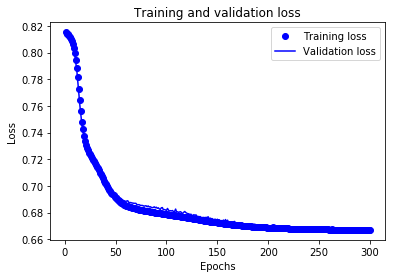

In [20]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

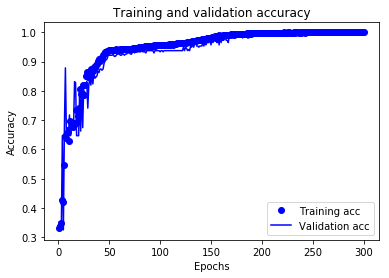

In [21]:
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()